In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math
import sklearn
import warnings
warnings.filterwarnings("ignore")

LOAD DATA SET

In [3]:
data = pd.read_csv( r'C:\Users\DELL\Downloads\CAR DETAILS (4).csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Checking Data Types

In [4]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Checking Data Shape

In [5]:
data.shape

(4340, 8)

Checking Data Describe

In [6]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Checking The Null Values

In [9]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Checking The Duplicates

In [10]:
data.duplicated().sum()

763

Handaling Duplicates

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(3577, 8)

In [13]:
year= data['year'].value_counts()
year.head()

2017    346
2012    338
2015    332
2014    321
2013    298
Name: year, dtype: int64

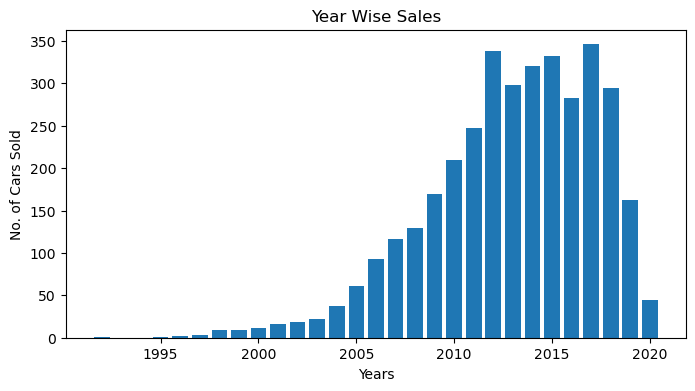

In [14]:
plt.figure(figsize=(8,4))
plt.bar(year.index,year)
plt.title('Year Wise Sales')
plt.xlabel('Years')
plt.ylabel('No. of Cars Sold')
plt.show()

In [15]:
fule = data['fuel'].value_counts()
fule

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

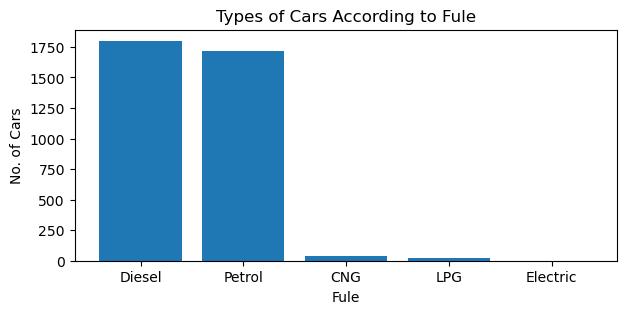

In [16]:
plt.figure(figsize=(7,3))
plt.bar(fule.index,fule)
plt.title('Types of Cars According to Fule')
plt.xlabel('Fule')
plt.ylabel('No. of Cars')
plt.show()

In [17]:
st = data['seller_type'].value_counts()
st

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

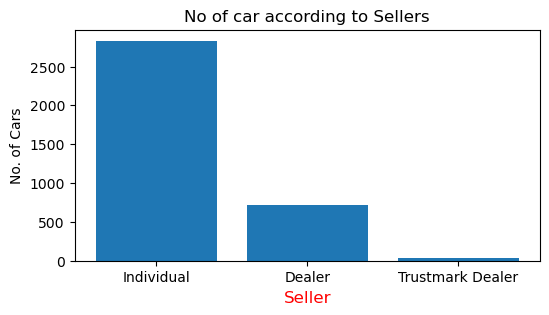

In [18]:
plt.figure(figsize=(6,3))
plt.bar(st.index,st)
plt.title('No of car according to Sellers')
plt.xlabel('Seller',color= 'r', size =12)
plt.ylabel('No. of Cars')
plt.show()

In [19]:
trans = data['transmission'].value_counts()
trans

Manual       3265
Automatic     312
Name: transmission, dtype: int64

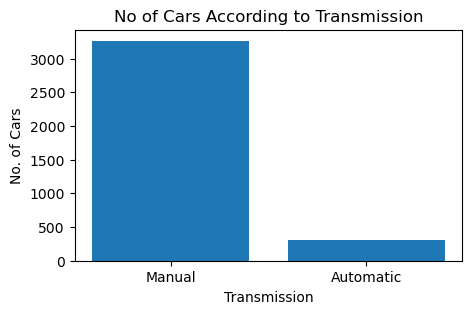

In [20]:
plt.figure(figsize=(5,3))
plt.bar(trans.index,trans)
plt.title('No of Cars According to Transmission')
plt.xlabel('Transmission')
plt.ylabel('No. of Cars')
plt.show()

In [21]:
d=data.corr()
d

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


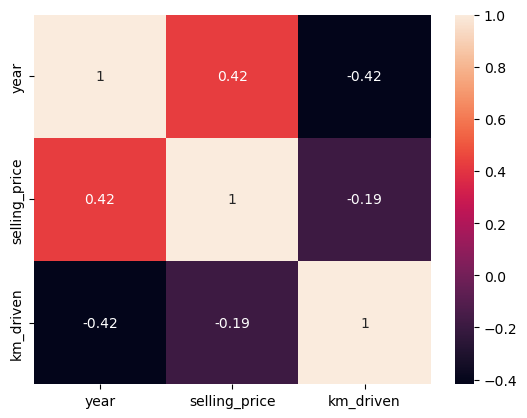

In [22]:
hm = sns.heatmap(data=d,annot = True)
plt.show()

Preparing The Model

In [23]:
df = data.copy()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [24]:
df.shape

(3577, 8)

One HOT Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lb = LabelEncoder

In [27]:
lb_data = df.apply(lb().fit_transform)

In [28]:
lb_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,13,17,474,4,1,1,0
1,1041,13,60,335,4,1,1,0
2,505,18,236,607,1,1,1,0
3,118,23,114,309,4,1,1,0
4,279,20,193,681,1,1,1,2


In [29]:
lb_data.shape

(3577, 8)

Scalling

In [30]:
col =  lb_data.columns

In [31]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
data1_scale = ms.fit_transform(lb_data)


In [32]:
data1_scale = pd.DataFrame(data1_scale, columns=[col])
data1_scale.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
5,0.544966,0.500000,0.139640,0.847854,1.00,0.5,1.0,0.0
263,0.397315,0.576923,0.308559,0.435631,1.00,0.5,1.0,0.0
1811,0.477181,0.769231,0.657658,0.507152,0.25,0.0,1.0,0.5
2631,0.975839,0.769231,0.414414,0.334200,1.00,0.5,1.0,0.0
3168,0.738926,0.692308,0.788288,0.841352,0.25,0.5,1.0,0.5
1800,0.891275,0.846154,0.385135,0.314694,0.25,0.0,1.0,0.0
530,0.562416,0.846154,0.434685,0.330299,1.00,1.0,0.0,0.5
308,0.063087,0.500000,0.162162,0.841352,0.25,0.5,1.0,1.0
165,0.859060,0.730769,0.056306,0.210663,1.00,0.5,1.0,0.0
3522,0.651678,0.769231,0.457207,0.791938,0.25,0.0,1.0,0.0


In [33]:
data1_scale.describe()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,0.507720,0.729350,0.382195,0.527779,0.610568,0.405088,0.912776,0.226307
std,0.266529,0.163428,0.224851,0.260530,0.377145,0.207539,0.282202,0.319288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.291946,0.615385,0.200450,0.304291,0.250000,0.500000,1.000000,0.000000
50%,0.532215,0.730769,0.351351,0.526658,0.250000,0.500000,1.000000,0.000000
75%,0.703356,0.846154,0.531532,0.745124,1.000000,0.500000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df1 = data1_scale
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0.520134,0.500000,0.038288,0.616385,1.00,0.5,1.0,0.0
1,0.698658,0.500000,0.135135,0.435631,1.00,0.5,1.0,0.0
2,0.338926,0.692308,0.531532,0.789337,0.25,0.5,1.0,0.0
3,0.079195,0.884615,0.256757,0.401821,1.00,0.5,1.0,0.0
4,0.187248,0.769231,0.434685,0.885566,0.25,0.5,1.0,0.5


REGRESSION

1. Linear regression

In [35]:
X = df1.drop('selling_price', axis =1)
y = df1['selling_price']
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(3577, 7)
(3577, 1)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(2861, 7)
(716, 7)
(2861, 1)
(716, 1)


In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
m1 =regressor.fit(X_train, y_train)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, ypred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

def train_test_scr(model):
    print('Training Score',model.score(X_train,y_train))
    print('Testing Score',model.score(X_test,y_test))

In [40]:
print(regressor.coef_)
print(regressor.intercept_)

[[-0.00719731  0.69833447 -0.08984968 -0.19382711 -0.05199343 -0.23872508
  -0.02492791]]
[0.28798896]


In [41]:
y_pred = regressor.predict(X_test)

In [42]:
lr_r2 = r2_score(y_test, y_pred)
lr_r2

0.6176233852295052

In [43]:
reg_eval_metrics(y_test, y_pred)

MAE: 0.11123455593438608
MSE: 0.02024013619585986
RMSE: 0.14226783261109963
R2 Score: 0.6176233852295052


In [44]:
train_test_scr(m1)

Training Score 0.6139283380946627
Testing Score 0.6176233852295052


2.KNN Regression

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
m2 = KNeighborsRegressor(n_neighbors=11)
m2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [47]:
ypred_m2 = m2.predict(X_test)
print(ypred_m2)

[[0.2536855 ]
 [0.11138411]
 [0.23218673]
 [0.40847666]
 [0.35053235]
 [0.47850123]
 [0.3511466 ]
 [0.48914824]
 [0.66687142]
 [0.24979525]
 [0.47686323]
 [0.245086  ]
 [0.17731368]
 [0.56695332]
 [0.24610975]
 [0.12059787]
 [0.45802621]
 [0.252457  ]
 [0.46232596]
 [0.17710893]
 [0.19676495]
 [0.47686323]
 [0.5460688 ]
 [0.21662572]
 [0.9531122 ]
 [0.51453726]
 [0.2471335 ]
 [0.59418509]
 [0.5452498 ]
 [0.35687961]
 [0.22440622]
 [0.36076986]
 [0.51719902]
 [0.55773956]
 [0.14742015]
 [0.29217854]
 [0.23832924]
 [0.41011466]
 [0.33333333]
 [0.30814906]
 [0.50921376]
 [0.3462326 ]
 [0.13001638]
 [0.48812449]
 [0.22993448]
 [0.43775594]
 [0.50470925]
 [0.33804259]
 [0.40601966]
 [0.12714988]
 [0.15642916]
 [0.42997543]
 [0.15663391]
 [0.68120393]
 [0.73423423]
 [0.1480344 ]
 [0.09930385]
 [0.502457  ]
 [0.25573301]
 [0.12469287]
 [0.19000819]
 [0.16461916]
 [0.55241605]
 [0.44389844]
 [0.30692056]
 [0.15990991]
 [0.29422604]
 [0.47583948]
 [0.6981982 ]
 [0.42751843]
 [0.21642097]
 [0.12

In [48]:
print(type(y_test))
print(type(ypred_m2))
print(y_test.shape)
print(ypred_m2.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(716, 1)
(716, 1)


In [49]:
knn_r2 = r2_score(y_test, ypred_m2)
knn_r2

0.6686515677578828

In [50]:
reg_eval_metrics(y_test, ypred_m2)

MAE: 0.09991638413426124
MSE: 0.017539088787870583
RMSE: 0.1324352248756749
R2 Score: 0.6686515677578828


In [51]:
train_test_scr(m2)

Training Score 0.7232581516004635
Testing Score 0.6686515677578828


Ridge  and Lasso

Ridge

In [52]:
from sklearn.linear_model import Ridge,Lasso

In [53]:
m3 = Ridge(alpha=0.7)  # lambda = alpha
m3.fit(X_train,y_train)

Ridge(alpha=0.7)

In [54]:
ypred_m3 = m3.predict(X_test)
print(ypred_m3)

[[ 3.10335164e-01]
 [ 7.84448410e-02]
 [ 2.93894480e-01]
 [ 4.58909696e-01]
 [ 3.74325700e-01]
 [ 3.72576827e-01]
 [ 4.40793344e-01]
 [ 5.04065905e-01]
 [ 6.99825855e-01]
 [ 2.28096603e-01]
 [ 4.00853259e-01]
 [ 2.26774739e-01]
 [ 3.37230614e-01]
 [ 4.47118235e-01]
 [ 3.17453258e-01]
 [ 1.51563021e-01]
 [ 4.78137299e-01]
 [ 2.07465161e-01]
 [ 4.88477237e-01]
 [ 2.12206350e-01]
 [ 2.50820056e-01]
 [ 3.63077214e-01]
 [ 5.40894174e-01]
 [ 2.72844362e-01]
 [ 8.77150167e-01]
 [ 3.77182407e-01]
 [ 2.59454875e-01]
 [ 5.74545218e-01]
 [ 4.53499300e-01]
 [ 4.45704148e-01]
 [ 1.31201518e-01]
 [ 4.01528215e-01]
 [ 6.93181144e-01]
 [ 7.29418210e-01]
 [ 1.38194271e-01]
 [ 3.40823526e-01]
 [ 2.78347725e-01]
 [ 3.33770154e-01]
 [ 2.92142937e-01]
 [ 4.18587941e-01]
 [ 4.94534670e-01]
 [ 4.09450816e-01]
 [ 1.11273757e-01]
 [ 5.74859371e-01]
 [ 2.99695581e-01]
 [ 4.30365399e-01]
 [ 4.50975888e-01]
 [ 4.03009572e-01]
 [ 5.00696204e-01]
 [ 1.24913944e-01]
 [ 1.83996456e-01]
 [ 4.22842906e-01]
 [ 1.8148334

In [55]:
rid_r2 = r2_score(y_test, ypred_m3)
rid_r2

0.6177681267241517

In [56]:
reg_eval_metrics(y_test,ypred_m3)

MAE: 0.11121986624439041
MSE: 0.020232474671980857
RMSE: 0.14224090365285527
R2 Score: 0.6177681267241517


In [57]:
train_test_scr(m3)

Training Score 0.6138981618556363
Testing Score 0.6177681267241517


Lasso

In [58]:
m4 = Lasso(alpha=11.5)  # lambda = alpha
m4.fit(X_train,y_train)

Lasso(alpha=11.5)

In [59]:
ypred_m4 = m4.predict(X_test)
print(ypred_m4)

[0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175
 0.38374175 0.38374175 0.38374175 0.38374175 0.38374175 0.3837

In [60]:
las_r2 = r2_score(y_test, ypred_m4)
las_r2

-0.0011285191902370428

In [61]:
reg_eval_metrics(y_test,ypred_m4)

MAE: 0.18980193651851995
MSE: 0.05299219877798199
RMSE: 0.2302003448693811
R2 Score: -0.0011285191902370428


In [62]:
train_test_scr(m4)

Training Score 0.0
Testing Score -0.0011285191902370428


Finding The Best Model

In [63]:
if lr_r2 > knn_r2 and lr_r2 > rid_r2:
    print('Best Model is Linear regression')
elif knn_r2 > lr_r2 and knn_r2 > rid_r2:
    print('Best Model is KNN Regression')
else:
    print('Best Model is Ridge Regression')

Best Model is KNN Regression


Save the best model and Load the model.

In [64]:
best_model = m2
best_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [65]:
import pickle

Saving the model

In [66]:
with open('best_model.pkl','wb') as model_file:
    pickle.dump(best_model,model_file)

loading the data

In [67]:
with open('best_model.pkl','rb') as model_file:
    loaded_model = pickle.load(model_file)

Randomly picking 20 data points

In [68]:
import random

In [69]:
df2 = df1.sample(frac=1 ,random_state=50)
random_20 = df2.head(20)
new_df = pd.DataFrame(random_20)
new_df.to_csv('20 car detail', index = False)

In [70]:
new_df.sample()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
798,0.862416,0.653846,0.011261,0.158648,1.0,0.5,1.0,0.0


In [71]:
print(new_df.shape)

(20, 8)


Using the best model(KNN) check

In [72]:
y = new_df['selling_price']

In [73]:
X = new_df.drop('selling_price', axis =1)

In [74]:
testing = KNeighborsRegressor(n_neighbors=11)
testing.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [75]:
ypred_testing = testing.predict(X_test)
print(ypred_testing)

[[0.2536855 ]
 [0.11138411]
 [0.23218673]
 [0.40847666]
 [0.35053235]
 [0.47850123]
 [0.3511466 ]
 [0.48914824]
 [0.66687142]
 [0.24979525]
 [0.47686323]
 [0.245086  ]
 [0.17731368]
 [0.56695332]
 [0.24610975]
 [0.12059787]
 [0.45802621]
 [0.252457  ]
 [0.46232596]
 [0.17710893]
 [0.19676495]
 [0.47686323]
 [0.5460688 ]
 [0.21662572]
 [0.9531122 ]
 [0.51453726]
 [0.2471335 ]
 [0.59418509]
 [0.5452498 ]
 [0.35687961]
 [0.22440622]
 [0.36076986]
 [0.51719902]
 [0.55773956]
 [0.14742015]
 [0.29217854]
 [0.23832924]
 [0.41011466]
 [0.33333333]
 [0.30814906]
 [0.50921376]
 [0.3462326 ]
 [0.13001638]
 [0.48812449]
 [0.22993448]
 [0.43775594]
 [0.50470925]
 [0.33804259]
 [0.40601966]
 [0.12714988]
 [0.15642916]
 [0.42997543]
 [0.15663391]
 [0.68120393]
 [0.73423423]
 [0.1480344 ]
 [0.09930385]
 [0.502457  ]
 [0.25573301]
 [0.12469287]
 [0.19000819]
 [0.16461916]
 [0.55241605]
 [0.44389844]
 [0.30692056]
 [0.15990991]
 [0.29422604]
 [0.47583948]
 [0.6981982 ]
 [0.42751843]
 [0.21642097]
 [0.12

In [76]:
reg_eval_metrics(y_test, ypred_testing)

MAE: 0.09991638413426124
MSE: 0.017539088787870583
RMSE: 0.1324352248756749
R2 Score: 0.6686515677578828


In [77]:
train_test_scr(testing)

Training Score 0.7232581516004635
Testing Score 0.6686515677578828
